In [24]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.models import Model
from keras.applications import vgg19
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input

In [25]:
def show_img(image, title=''):
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.show()

def vgg19_preprocess_img(img):
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def preprocess_img(path_to_img, show = False, title = ''):
    img = load_img(path_to_img, target_size=(TARGET_HEIGHT, TARGET_WIDTH))
    if show:
        show_img(img, title)
    img = img_to_array(img)
    return vgg19_preprocess_img(img)

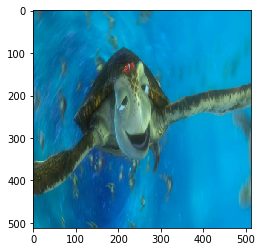

In [26]:
TARGET_HEIGHT = 512
TARGET_WIDTH = 512
TARGET_CHANNELS = 3

CONTENT_PATH = '../data/turtle.png'
img = tf.Variable(preprocess_img(CONTENT_PATH, show=True))

In [40]:
def get_model():
    vgg = vgg19.VGG19(include_top=False, weights='imagenet')
    return Model(vgg.input, vgg.output)

model = get_model()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output = sess.run(model(img))
    print(output.shape)


(1, 16, 16, 512)
